# Bar Graph Classification

Teng-Jui Lin

- Created: 2023-05-27
- Edited: 2024-07-15

In [1]:
from bar_constants import *
set_save_fig_rc()
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## Calculate article statistics

### Import Zotero article data

In [2]:
# import zotero article data
articles_df = pd.DataFrame()
for i, journal in enumerate(JOURNALS):
    filepath = f'data/zotero_data'
    filename = os.path.join(filepath, f'{journal}.csv')
    articles_df_ = pd.read_csv(filename)
    articles_df = pd.concat([articles_df, articles_df_])
articles_df.shape

(3387, 87)

### Calculate number of authors

In [3]:
# extract individual authors
authors_df_ = articles_df['Author'].str.split(';', expand=True)
# calculate number of authors
num_authors_series = (~pd.isna(authors_df_)).sum(axis=1)
articles_df[NUM_AUTHORS_LABEL] = num_authors_series

### Add article statistics labels

In [4]:
def assign_boolean(df, regex, label, assigned_bool):
    df.loc[df[MANUAL_TAGS_LABEL].str.contains(regex), label] = assigned_bool

In [5]:
# mutually exclusive label: does the article has at least 1 bar graph
articles_df[HAS_BAR_GRAPH_LABEL] = True
assign_boolean(articles_df, NO_BAR_GRAPH_REGEX_LABEL, HAS_BAR_GRAPH_LABEL, False)

In [6]:
# mutually exclusive label: does the article has at least 1 inaccurate bar graph
# separated into two columns because have articles with no bar graph
articles_df[NO_MISUSE_LABEL] = False
articles_df[HAS_MISUSE_LABEL] = False
assign_boolean(articles_df, NO_MISUSE_REGEX_LABEL, NO_MISUSE_LABEL, True)
assign_boolean(articles_df, HAS_MISUSE_REGEX_LABEL, HAS_MISUSE_LABEL, True)

In [7]:
# non-mutually exclusive labels with one hot encoding
# log, zero, others
articles_df[ZERO_PROBLEM_LABEL] = False
articles_df[LOG_PROBLEM_LABEL] = False
articles_df[OTHER_PROBLEM_LABEL] = False
assign_boolean(articles_df, ZERO_PROBLEM_REGEX_LABEL, ZERO_PROBLEM_LABEL, True)
assign_boolean(articles_df, LOG_PROBLEM_REGEX_LABEL, LOG_PROBLEM_LABEL, True)
assign_boolean(articles_df, OTHER_PROBLEM_REGEX_LABEL, OTHER_PROBLEM_LABEL, True)

In [8]:
def get_article_stats(df, cond):
    return df[cond].groupby(PUBLICATION_LABEL).count().iloc[:, 0]

### Calculate cumulative article statistics

In [9]:
articles_stat_df = pd.DataFrame()
articles_stat_df[NUM_ARTICLES_LABEL] = articles_df.groupby(PUBLICATION_LABEL).count().iloc[:, 0]
articles_stat_df[NUM_ARTICLES_WITH_BAR_GRAPH_LABEL] = get_article_stats(articles_df, articles_df[HAS_BAR_GRAPH_LABEL] == True)
articles_stat_df[NUM_ARTICLES_WITHOUT_BAR_GRAPH_LABEL] = get_article_stats(articles_df, ~articles_df[HAS_BAR_GRAPH_LABEL] == True)
articles_stat_df[NUM_ARTICLES_CORRECT_BAR_GRAPH_LABEL] = get_article_stats(articles_df, articles_df[NO_MISUSE_LABEL] == True)
articles_stat_df[NUM_ARTICLES_INCORRECT_BAR_GRAPH_LABEL] = get_article_stats(articles_df, articles_df[HAS_MISUSE_LABEL] == True)
articles_stat_df[NUM_ARTICLES_ZERO_PROBLEM_LABEL] = get_article_stats(articles_df, articles_df[ZERO_PROBLEM_LABEL] == True)
articles_stat_df[NUM_ARTICLES_LOG_PROBLEM_LABEL] = get_article_stats(articles_df, articles_df[LOG_PROBLEM_LABEL] == True)
articles_stat_df[NUM_ARTICLES_OTHER_PROBLEM_LABEL] = get_article_stats(articles_df, articles_df[OTHER_PROBLEM_LABEL] == True)
articles_stat_df = articles_stat_df.fillna(0)
articles_stat_df.loc[TOTAL_LABEL, :] = articles_stat_df.sum(axis=0)

In [10]:
articles_stat_df[PERCENT_ARTICLES_WITHOUT_BAR_GRAPH_LABEL] = articles_stat_df[NUM_ARTICLES_WITHOUT_BAR_GRAPH_LABEL] / articles_stat_df[NUM_ARTICLES_LABEL] * 100
articles_stat_df[PERCENT_ARTICLES_WITH_BAR_GRAPH_LABEL] = articles_stat_df[NUM_ARTICLES_WITH_BAR_GRAPH_LABEL] / articles_stat_df[NUM_ARTICLES_LABEL] * 100
articles_stat_df[PERCENT_ARTICLES_CORRECT_BAR_GRAPH_LABEL] = articles_stat_df[NUM_ARTICLES_CORRECT_BAR_GRAPH_LABEL] / articles_stat_df[NUM_ARTICLES_WITH_BAR_GRAPH_LABEL] * 100
articles_stat_df[PERCENT_ARTICLES_INCORRECT_BAR_GRAPH_LABEL] = articles_stat_df[NUM_ARTICLES_INCORRECT_BAR_GRAPH_LABEL] / articles_stat_df[NUM_ARTICLES_WITH_BAR_GRAPH_LABEL] * 100
articles_stat_df[PERCENT_ARTICLES_ZERO_PROBLEM_LABEL] = articles_stat_df[NUM_ARTICLES_ZERO_PROBLEM_LABEL] / articles_stat_df[NUM_ARTICLES_WITH_BAR_GRAPH_LABEL] * 100
articles_stat_df[PERCENT_ARTICLES_LOG_PROBLEM_LABEL] = articles_stat_df[NUM_ARTICLES_LOG_PROBLEM_LABEL] / articles_stat_df[NUM_ARTICLES_WITH_BAR_GRAPH_LABEL] * 100
articles_stat_df[PERCENT_ARTICLES_OTHER_PROBLEM_LABEL] = articles_stat_df[NUM_ARTICLES_OTHER_PROBLEM_LABEL] / articles_stat_df[NUM_ARTICLES_WITH_BAR_GRAPH_LABEL] * 100

In [11]:
# temporarily remove total for sorting
articles_stat_total_series = articles_stat_df.loc[TOTAL_LABEL, :]
articles_stat_df = articles_stat_df.drop(TOTAL_LABEL)

In [12]:
articles_stat_df = articles_stat_df.sort_values(PERCENT_ARTICLES_INCORRECT_BAR_GRAPH_LABEL, ascending=False)
articles_stat_df.loc[TOTAL_LABEL, :] = articles_stat_total_series
articles_stat_df

,Total number of articles,Number of articles with bar graphs,Number of articles without bar graphs,Number of articles with correct bar graphs,Number of articles with incorrect bar graphs,Number of articles with nonzero bar graph y-min,Number of articles with logarithmic bar graph y axis,Number of articles with other bar graph misrepresentations,Percentage of articles without bar graphs,Percentage of articles with bar graphs,Percentage of articles with correct bar graphs,Percentage of articles with incorrect bar graphs,Percentage of articles with nonzero bar graph y-min,Percentage of articles with logarithmic bar graph y axis,Percentage of articles with other bar graph misrepresentations
Publication Title,,,,,,,,,,,,,,,
Nature Biomedical Engineering,109.0,91.0,18.0,50.0,41.0,23.0,21.0,2.0,16.513761,83.486239,54.945055,45.054945,25.274725,23.076923,2.197802
Cell,297.0,283.0,14.0,177.0,106.0,48.0,60.0,9.0,4.713805,95.286195,62.544170,37.455830,16.961131,21.201413,3.180212
Science Translational Medicine,248.0,224.0,24.0,141.0,83.0,45.0,35.0,18.0,9.677419,90.322581,62.946429,37.053571,20.089286,15.625000,8.035714
ACS Nano,824.0,725.0,99.0,475.0,250.0,180.0,57.0,36.0,12.014563,87.985437,65.517241,34.482759,24.827586,7.862069,4.965517
Science Immunology,116.0,111.0,5.0,73.0,38.0,20.0,22.0,4.0,4.310345,95.689655,65.765766,34.234234,18.018018,19.819820,3.603604
Nature Cancer,75.0,75.0,0.0,53.0,22.0,7.0,17.0,3.0,0.000000,100.000000,70.666667,29.333333,9.333333,22.666667,4.000000
Nature,554.0,487.0,67.0,357.0,130.0,79.0,59.0,10.0,12.093863,87.906137,73.305955,26.694045,16.221766,12.114990,2.053388
Nature Nanotechnology,55.0,45.0,10.0,33.0,12.0,6.0,5.0,2.0,18.181818,81.818182,73.333333,26.666667,13.333333,11.111111,4.444444
Nature Biotechnology,157.0,140.0,17.0,103.0,37.0,12.0,24.0,5.0,10.828025,89.171975,73.571429,26.428571,8.571429,17.142857,3.571429


### Extract sub-dataframes of interest and key statistics

In [13]:
articles_stat_df

,Total number of articles,Number of articles with bar graphs,Number of articles without bar graphs,Number of articles with correct bar graphs,Number of articles with incorrect bar graphs,Number of articles with nonzero bar graph y-min,Number of articles with logarithmic bar graph y axis,Number of articles with other bar graph misrepresentations,Percentage of articles without bar graphs,Percentage of articles with bar graphs,Percentage of articles with correct bar graphs,Percentage of articles with incorrect bar graphs,Percentage of articles with nonzero bar graph y-min,Percentage of articles with logarithmic bar graph y axis,Percentage of articles with other bar graph misrepresentations
Publication Title,,,,,,,,,,,,,,,
Nature Biomedical Engineering,109.0,91.0,18.0,50.0,41.0,23.0,21.0,2.0,16.513761,83.486239,54.945055,45.054945,25.274725,23.076923,2.197802
Cell,297.0,283.0,14.0,177.0,106.0,48.0,60.0,9.0,4.713805,95.286195,62.544170,37.455830,16.961131,21.201413,3.180212
Science Translational Medicine,248.0,224.0,24.0,141.0,83.0,45.0,35.0,18.0,9.677419,90.322581,62.946429,37.053571,20.089286,15.625000,8.035714
ACS Nano,824.0,725.0,99.0,475.0,250.0,180.0,57.0,36.0,12.014563,87.985437,65.517241,34.482759,24.827586,7.862069,4.965517
Science Immunology,116.0,111.0,5.0,73.0,38.0,20.0,22.0,4.0,4.310345,95.689655,65.765766,34.234234,18.018018,19.819820,3.603604
Nature Cancer,75.0,75.0,0.0,53.0,22.0,7.0,17.0,3.0,0.000000,100.000000,70.666667,29.333333,9.333333,22.666667,4.000000
Nature,554.0,487.0,67.0,357.0,130.0,79.0,59.0,10.0,12.093863,87.906137,73.305955,26.694045,16.221766,12.114990,2.053388
Nature Nanotechnology,55.0,45.0,10.0,33.0,12.0,6.0,5.0,2.0,18.181818,81.818182,73.333333,26.666667,13.333333,11.111111,4.444444
Nature Biotechnology,157.0,140.0,17.0,103.0,37.0,12.0,24.0,5.0,10.828025,89.171975,73.571429,26.428571,8.571429,17.142857,3.571429


In [14]:
# extract sub-df for plotting
percent_bar_df = articles_stat_df.loc[:, [
    PERCENT_ARTICLES_WITH_BAR_GRAPH_LABEL, 
    PERCENT_ARTICLES_WITHOUT_BAR_GRAPH_LABEL,
]]
percent_bar_correct_df = articles_stat_df.loc[:, [
    PERCENT_ARTICLES_INCORRECT_BAR_GRAPH_LABEL, 
    PERCENT_ARTICLES_CORRECT_BAR_GRAPH_LABEL,
]]
percent_bar_incorrect_df = articles_stat_df.loc[:, [
    PERCENT_ARTICLES_ZERO_PROBLEM_LABEL,
    PERCENT_ARTICLES_LOG_PROBLEM_LABEL,
    PERCENT_ARTICLES_OTHER_PROBLEM_LABEL,
]]
total_articles_series = articles_stat_df.loc[:, NUM_ARTICLES_LABEL]
articles_bar_graph_series = articles_stat_df.loc[:, NUM_ARTICLES_WITH_BAR_GRAPH_LABEL]

In [15]:
# mutually exclusive categories
# percentage based on number of all articles
percent_bar_df.loc[TOTAL_LABEL, :]

Percentage of articles with bar graphs       88.131089
Percentage of articles without bar graphs    11.868911
Name: Total, dtype: float64

In [16]:
# mutually exclusive categories
# percentage based on number of all articles
percent_bar_correct_df.loc[TOTAL_LABEL, :]

Percentage of articles with incorrect bar graphs    29.279732
Percentage of articles with correct bar graphs      70.720268
Name: Total, dtype: float64

In [17]:
# non-mutually exclusive categories
# percentage based on number of articles with at least 1 incorrect bar graph
# note this percentage does not add up to the above percentage
# because one article could have multiple types of problems
percent_bar_incorrect_df.loc[TOTAL_LABEL, :]

Percentage of articles with nonzero bar graph y-min               17.520938
Percentage of articles with logarithmic bar graph y axis          11.859296
Percentage of articles with other bar graph misrepresentations     3.450586
Name: Total, dtype: float64

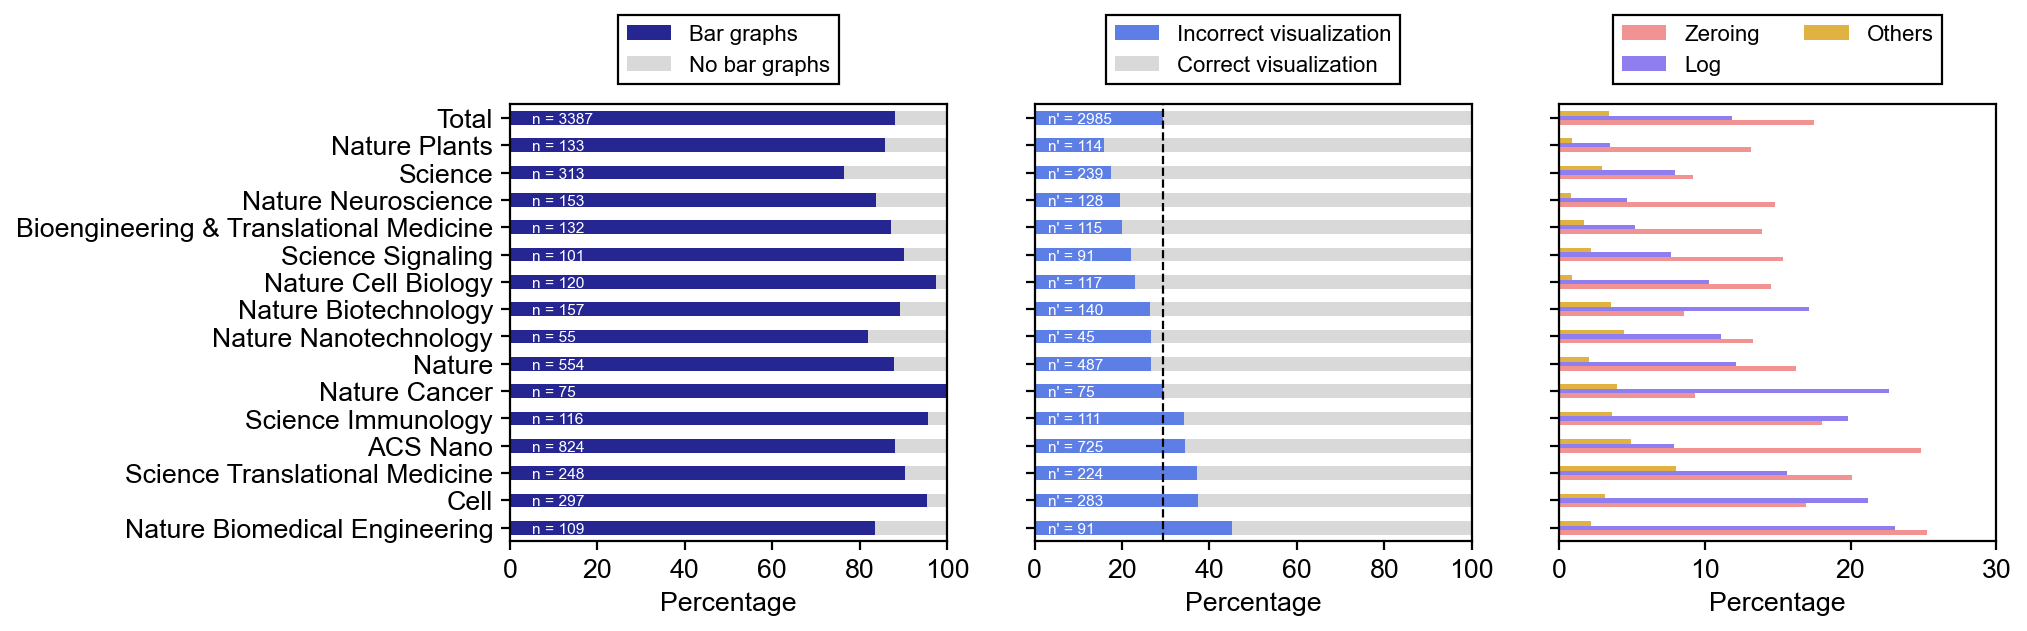

In [18]:
alpha = 0.85
total_misuse_percentage = percent_bar_correct_df.loc[TOTAL_LABEL, PERCENT_ARTICLES_INCORRECT_BAR_GRAPH_LABEL]
fig, axs = plt.subplots(1, 3, figsize=(13, 4), sharey=True)
percent_bar_df.plot(
    kind='barh', 
    stacked=True, 
    ax=axs[0],
    legend=False,
    alpha=alpha,
    color=[ARTICLES_WITH_BAR_GRAPH_COLOR, ARTICLES_WITHOUT_BAR_GRAPH_COLOR], 
)
percent_bar_correct_df.plot(
    kind='barh', 
    stacked=True, 
    ax=axs[1],
    legend=False,
    alpha=alpha,
    color=[ARTICLES_INCORRECT_BAR_GRAPH_COLOR, ARTICLES_CORRECT_BAR_GRAPH_COLOR], 
)
percent_bar_incorrect_df.plot(
    kind='barh', 
    stacked=False, 
    ax=axs[2],
    legend=True,
    alpha=alpha,
    color=[ARTICLES_ZERO_PROBLEM_COLOR, ARTICLES_LOG_PROBLEM_COLOR, ARTICLES_OTHER_PROBLEM_COLOR], 
)

# iterable plot settings
for i in range(2):
    axs[i].set_xlim(0, 100)
for i in range(3):
    axs[i].set_box_aspect(1)
    axs[i].set_xlabel('Percentage')

# individual plot settings
axs[0].set_ylabel('')
axs[2].set_xlim(0, 30)

# plot legends
axs[0].legend(
    ['Bar graphs', 'No bar graphs'], 
    bbox_to_anchor=(0.5, 1.02), 
    loc='lower center',
)
axs[1].legend(
    ['Incorrect visualization', 'Correct visualization'], 
    bbox_to_anchor=(0.5, 1.02), 
    loc='lower center',
)
axs[2].legend(
    [ZERO_LABEL, LOG_LABEL, OTHERS_LABEL], 
    bbox_to_anchor=(0.5, 1.02), 
    loc='lower center',
    ncol=2,
)

# overlay n onto bars in subplot 1/3
for i in range(total_articles_series.shape[0]):
    try:
        axs[0].text(5, i - 0.2, f'n = {int(total_articles_series.iloc[i])}', fontsize=7, color='w')
    except ValueError:
        pass

# overlay n onto bars in subplot 1/3
for i in range(total_articles_series.shape[0]):
    try:
        axs[1].text(3, i - 0.2, f'n\' = {int(articles_bar_graph_series.iloc[i])}', fontsize=7, color='w')
    except ValueError:
        pass

# add average line to subplot 2/3
axs[1].axvline(
    total_misuse_percentage,
    color='k',
    lw=1,
    ls='--'
)
plt.tight_layout()
# fig.savefig('article-stat.pdf')

(a) Percentage of articles with or without bar graphs in n articles retrieved from each journal. (b) Percentage of articles with or without incorrect bar graph visualization in n articles with at least one bar graph. Dashed line represents the percentage of incorrect visualization from all sampled articles. (c) Percentage of articles with zeroing, log, and other bar graph visualization mistakes in articles with at least one bar graph.

## Correlation of article classification statistics

### Construct structured files for quantity annotation

Change `generate_annotation` to True to generate (or override) a fresh quantity annotation sheet.

In [19]:
generate_annotation = False
file_df = pd.DataFrame()
for j, mistake in enumerate(MISTAKES):
    for i, journal in enumerate(JOURNALS):
        filepath = f'data/misused_bar_graph_figures/{journal}/{mistake}'
        file_list = pd.Series(sorted(os.listdir(filepath)))
        file_list = file_list[file_list.str.contains('.png')]
        file_list = file_list.str.replace('.png', '')
        figidx = file_list.copy()
        file_list = file_list.str.replace('fig', '')
        new_file_df = file_list.str.split('_', expand=True)
        new_file_df.columns = ['DOI', 'Mistake', 'Fig ID']
        new_file_df['Journal'] = journal
        new_file_df['Fig Index'] = figidx
        new_file_df = new_file_df.set_index('Fig Index')
        if generate_annotation:
            new_file_df.to_excel(os.path.join(filepath, 'annotation.xlsx'))

### Import quantity annotation data

In [20]:
bar_annot_df = pd.DataFrame()
for j, mistake in enumerate(MISTAKES):
    for i, journal in enumerate(JOURNALS):
        filepath = f'data/misused_bar_graph_figures/{journal}/{mistake}'
        filename = os.path.join(filepath, 'annotation.xlsx')
        bar_annot_df_ = pd.read_excel(filename)
        bar_annot_df = pd.concat([bar_annot_df, bar_annot_df_]).reset_index(drop=True)
bar_annot_df.shape

(3566, 11)

In [21]:
bar_annot_df.groupby(['DOI', 'Mistake', 'Physical quantity II']).count().iloc[:, 0]

DOI                           Mistake  Physical quantity II
10.1002:btm2.10487            log      Constant                2
10.1002:btm2.10499            zero     Concentration           6
10.1002:btm2.10504            zero     Concentration           1
10.1002:btm2.10505            zero     Concentration           2
10.1002:btm2.10514            log      Concentration           2
                                                              ..
10.1126:scitranslmed.adh4529  log      Percentage              2
10.1126:scitranslmed.adh7668  zero     Count                   1
10.1126:scitranslmed.adi1617  log      Fluorescence            1
10.1126:scitranslmed.adi7244  zero     Percentage              3
10.1126:scitranslmed.adi9867  log      Count                   2
Name: Fig Index, Length: 1202, dtype: int64

### Quantifying graph-level bias

In [22]:
# 同一种错误（mistake, physical quantity）在一个文章（DOI）里能犯错几次？
# journal redundant but for for later use
# how much graph-level bias can we get?
graph_bias_count_df = bar_annot_df.groupby(['Journal', 'DOI', 'Mistake', 'Physical quantity II']).count().iloc[:, 0]
graph_bias_count_df.name = 'Count'
graph_bias_count_df = graph_bias_count_df.reset_index()
graph_bias_count_df

,Journal,DOI,Mistake,Physical quantity II,Count
0,acs_nano,10.1021:acsnano.2c07293,zero,Temperature,1
1,acs_nano,10.1021:acsnano.2c07436,log,Others,1
2,acs_nano,10.1021:acsnano.2c07436,zero,Percentage,1
3,acs_nano,10.1021:acsnano.2c07439,zero,Fluorescence,1
4,acs_nano,10.1021:acsnano.2c08153,log,Concentration,2
...,...,...,...,...,...
1197,science,10.1126:science.adi4720,zero,Temperature,3
1198,science,10.1126:science.adi8885,log,Ratio,3
1199,science,10.1126:science.adi8885,zero,Count,15
1200,science,10.1126:science.adi8885,zero,Percentage,2


(0.0, 25.0)

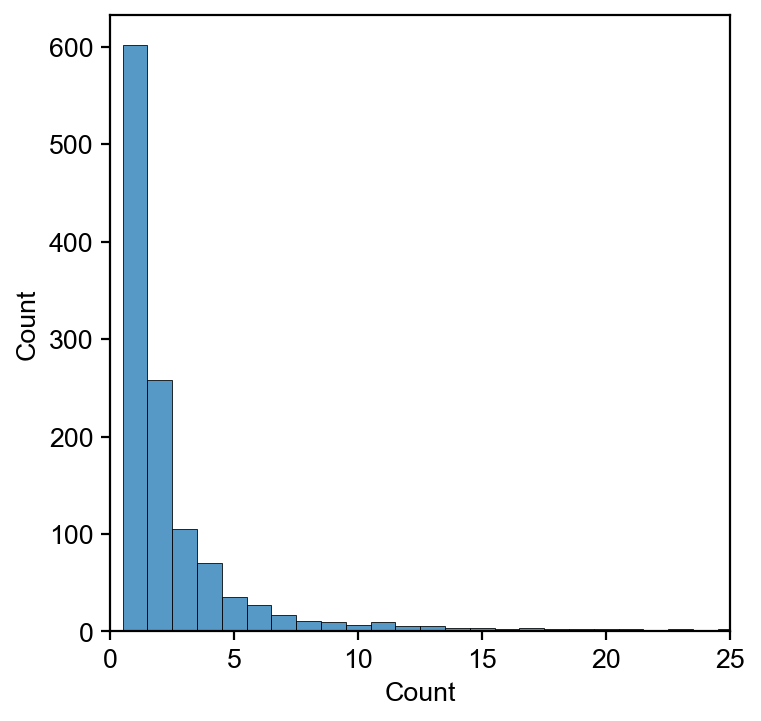

In [23]:
bins = np.arange(0.5, graph_bias_count_df['Count'].max() + 0.5, 1)
fig, ax = plt.subplots(figsize=(5, 5))
sns.histplot(
    graph_bias_count_df,
    x='Count',
    bins=bins,
    ax=ax,
)
ax.set_xlim(0, 25)

(0.0, 25.0)

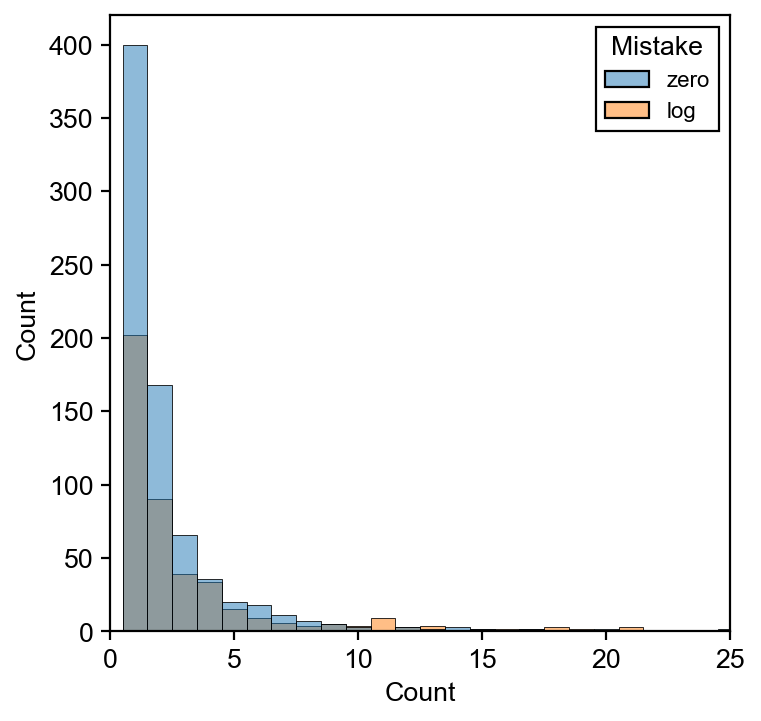

In [24]:
bins = np.arange(0.5, graph_bias_count_df['Count'].max() + 0.5, 1)
fig, ax = plt.subplots(figsize=(5, 5))
sns.histplot(
    graph_bias_count_df,
    x='Count',
    hue='Mistake',
    bins=bins,
    ax=ax,
)
ax.set_xlim(0, 25)

(0.0, 60.0)

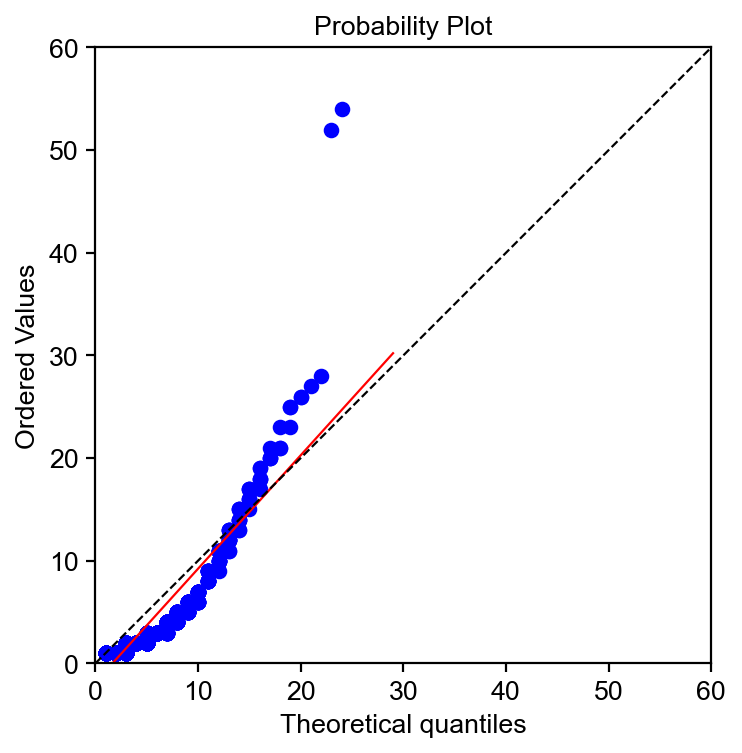

In [25]:
fig, ax = plt.subplots(figsize=(5, 5))
res = scipy.stats.probplot(
    graph_bias_count_df['Count'],
    dist=scipy.stats.geom,
    sparams=(0.23,),
    plot=ax,
)
ax.plot([0, 60], [0, 60], 'k--')
ax.set_box_aspect(1)
ax.set_aspect('equal')
ax.set_xlim(0, 60)
ax.set_ylim(0, 60)

### Quantifying frequency of making mistakes

In [26]:
# 同一篇文章（DOI）里能犯几个不同的错误（mistake, physical quantity）？
# journal redundant but for later use
# how many mistake (with graph-level bias mitigated) do people make per article?

mistake_count_df = graph_bias_count_df.groupby(['Journal', 'DOI', 'Mistake']).count()['Count']
mistake_count_df = mistake_count_df.reset_index()
mistake_count_df

,Journal,DOI,Mistake,Count
0,acs_nano,10.1021:acsnano.2c07293,zero,1
1,acs_nano,10.1021:acsnano.2c07436,log,1
2,acs_nano,10.1021:acsnano.2c07436,zero,1
3,acs_nano,10.1021:acsnano.2c07439,zero,1
4,acs_nano,10.1021:acsnano.2c08153,log,1
...,...,...,...,...
871,science,10.1126:science.adi2246,log,2
872,science,10.1126:science.adi4720,zero,1
873,science,10.1126:science.adi8885,log,1
874,science,10.1126:science.adi8885,zero,2


(0.0, 7.0)

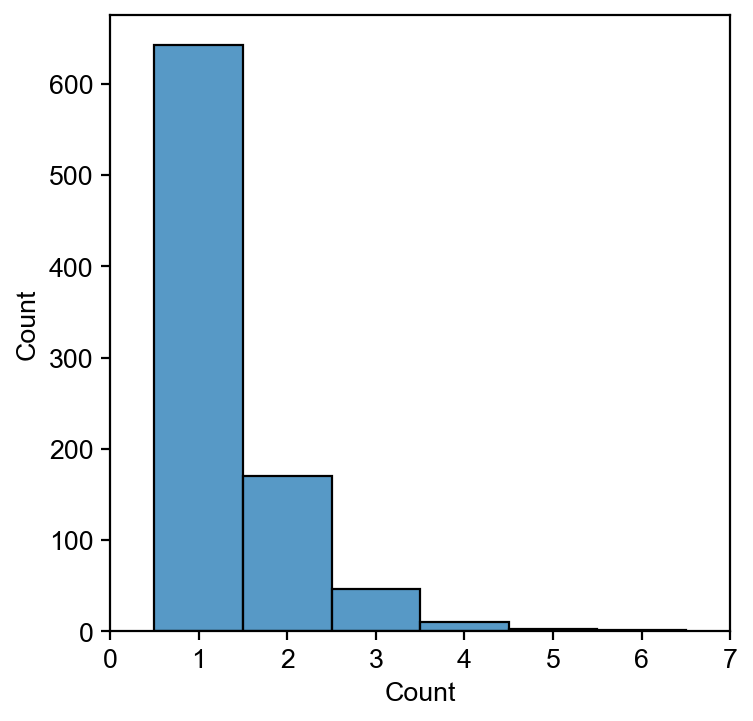

In [27]:
bins = np.arange(0.5, mistake_count_df['Count'].max() + 0.5, 1)
fig, ax = plt.subplots(figsize=(5, 5))
sns.histplot(
    mistake_count_df,
    x='Count',
    bins=bins,
    ax=ax,
)
ax.set_xlim(0, 7)

(0.0, 7.0)

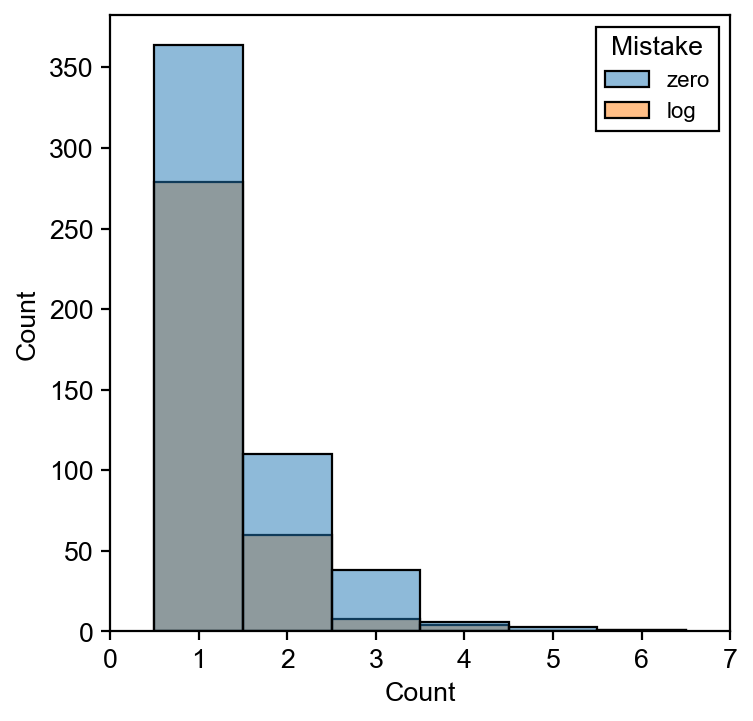

In [28]:
bins = np.arange(0.5, mistake_count_df['Count'].max() + 0.5, 1)
fig, ax = plt.subplots(figsize=(5, 5))
sns.histplot(
    mistake_count_df,
    x='Count',
    hue='Mistake',
    bins=bins,
    ax=ax,
)
ax.set_xlim(0, 7)

(0.0, 8.0)

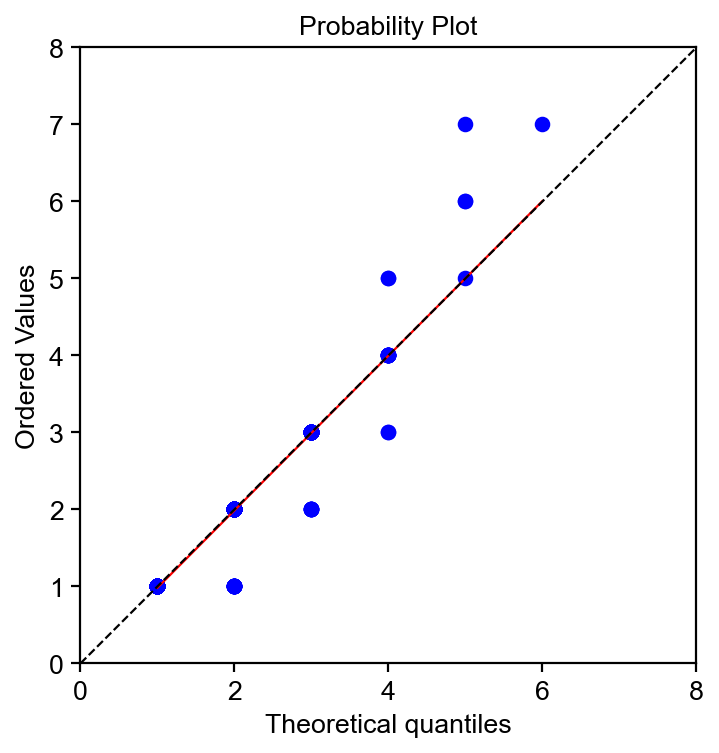

In [29]:
fig, ax = plt.subplots(figsize=(5, 5))
res = scipy.stats.probplot(
    mistake_count_df['Count'],
    dist=scipy.stats.geom,
    sparams=(0.72,),
    plot=ax,
)
xmax = 8
ymax = xmax
ax.plot([0, xmax], [0, ymax], 'k--')
ax.set_box_aspect(1)
ax.set_aspect('equal')
ax.set_xlim(0, xmax)
ax.set_ylim(0, ymax)

## Amount of mistakes per journal

### Median

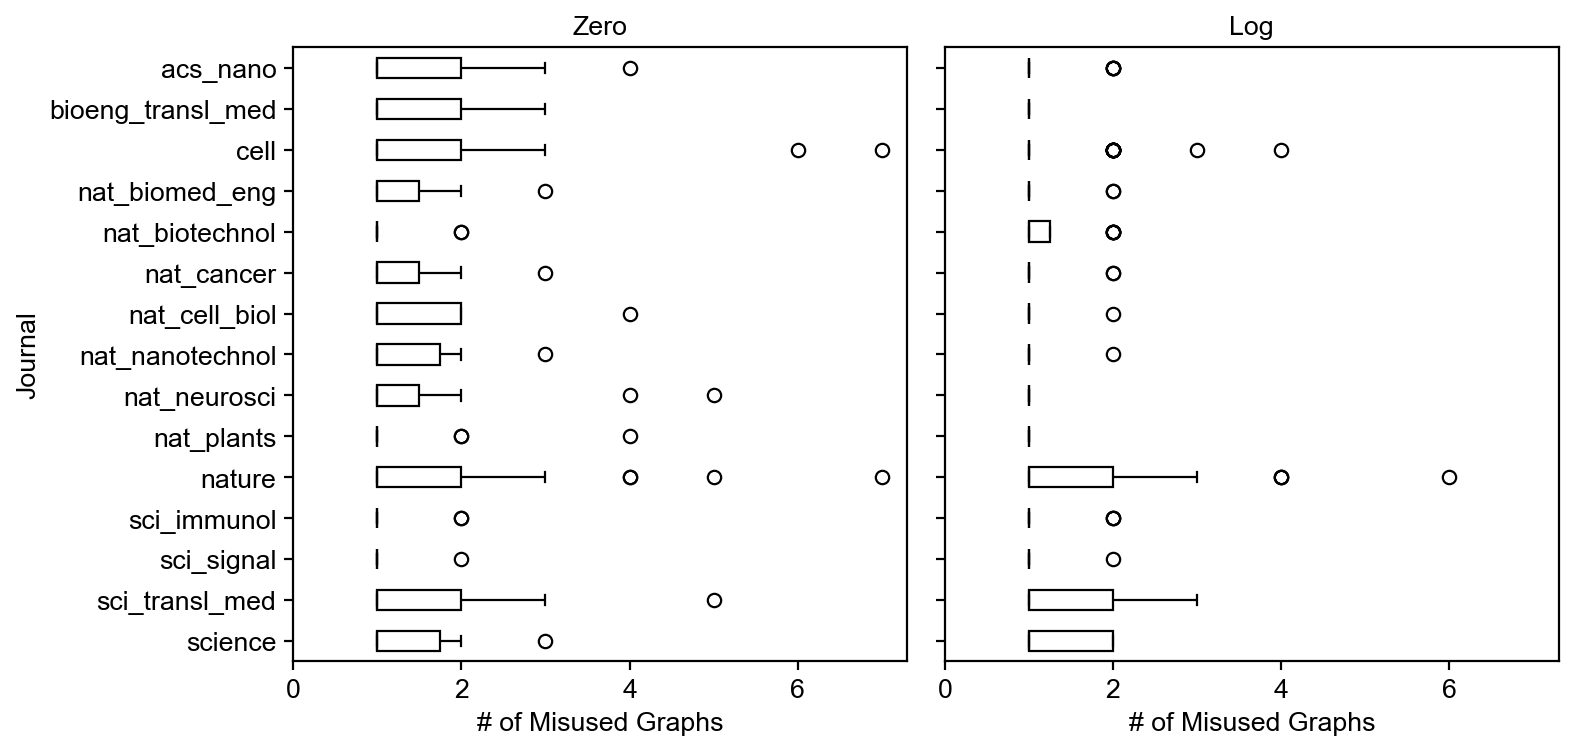

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)
sns.boxplot(
    mistake_count_df[mistake_count_df['Mistake'] == 'zero'],
    y='Journal',
    x='Count',
    ax=axs[0],
    color='w',
    linecolor='k',
    width=0.5,
)
sns.boxplot(
    mistake_count_df[mistake_count_df['Mistake'] == 'log'],
    y='Journal',
    x='Count',
    ax=axs[1],
    color='w',
    linecolor='k',
    width=0.5,
)
axs[0].set_title('Zero')
axs[1].set_title('Log')
for i in range(2):
    axs[i].set_box_aspect(1)
    axs[i].set_xlim(0)
    axs[i].set_xlabel('# of Misused Graphs')
plt.tight_layout()

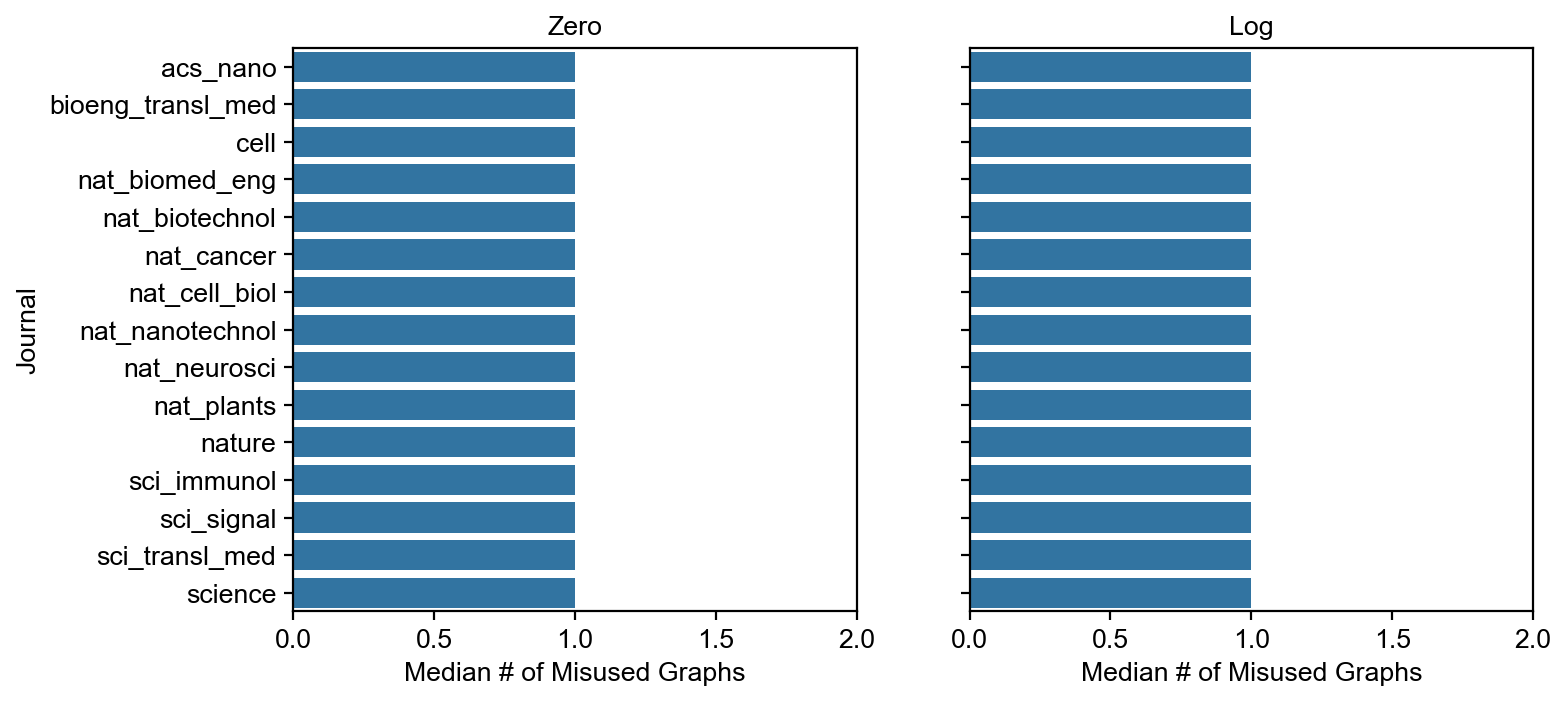

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)
sns.barplot(
    mistake_count_df.loc[mistake_count_df['Mistake'] == 'zero'].groupby('Journal').agg({'Count': 'median'}).reset_index(),
    y='Journal',
    x='Count',
    ax=axs[0],
)
sns.barplot(
    mistake_count_df.loc[mistake_count_df['Mistake'] == 'log'].groupby('Journal').agg({'Count': 'median'}).reset_index(),
    y='Journal',
    x='Count',
    ax=axs[1],
)
axs[0].set_title('Zero')
axs[1].set_title('Log')
for i in range(2):
    axs[i].set_box_aspect(1)
    axs[i].set_xlim(0, 2)
    axs[i].set_xlabel('Median # of Misused Graphs')

### Mean

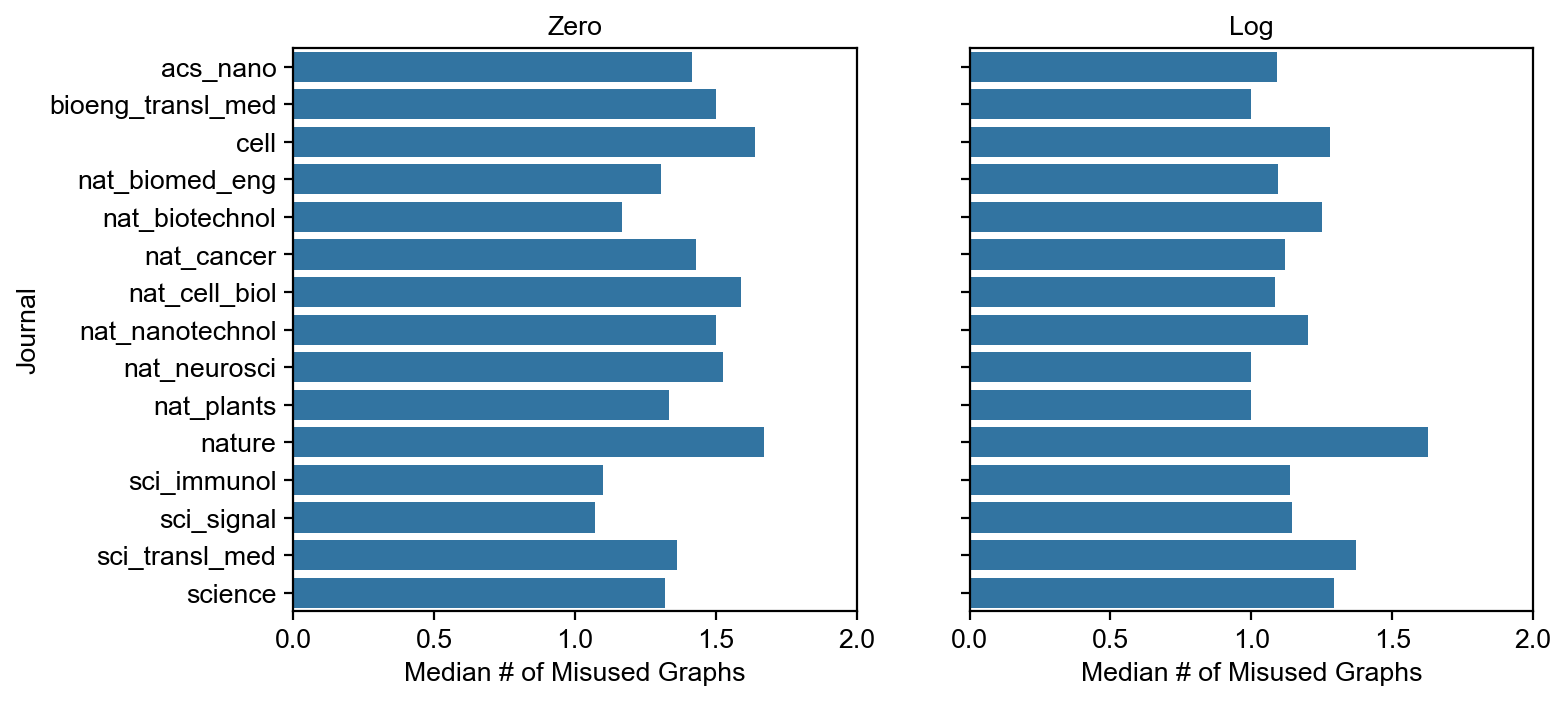

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)
sns.barplot(
    mistake_count_df.loc[mistake_count_df['Mistake'] == 'zero'].groupby('Journal').agg({'Count': 'mean'}).reset_index(),
    y='Journal',
    x='Count',
    ax=axs[0],
)
sns.barplot(
    mistake_count_df.loc[mistake_count_df['Mistake'] == 'log'].groupby('Journal').agg({'Count': 'mean'}).reset_index(),
    y='Journal',
    x='Count',
    ax=axs[1],
)
axs[0].set_title('Zero')
axs[1].set_title('Log')
for i in range(2):
    axs[i].set_box_aspect(1)
    axs[i].set_xlim(0, 2)
    axs[i].set_xlabel('Median # of Misused Graphs')

## Correlation with number of authors

### Articles with bar graphs on average has more authors

n = 2985 Bar graph
n = 402 No bar graph
Visualization excluded outlier 49/3387 = 0.01446708001180986
n = 874 Incorrect visualization
n = 2111 Correct visualization
Visualization excluded outlier 44/2985 = 0.01474036850921273
n = 523 Zeroing
n = 282 Log
Visualization excluded outlier 12/805 = 0.014906832298136646


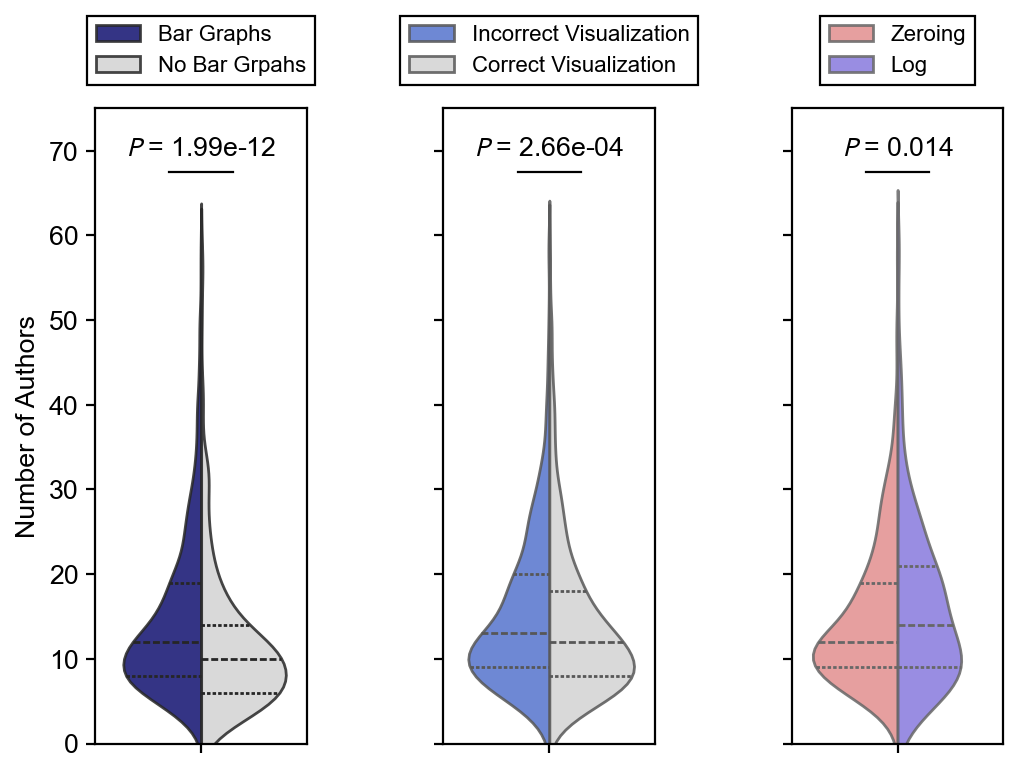

In [33]:
alpha = 0.85
author_count_viz_max = 60

fig, axs = plt.subplots(1, 3, figsize=(7, 5), sharey=True)
## subplot 1
print(f'n = {sum(articles_df[HAS_BAR_GRAPH_LABEL] == True)} Bar graph')
print(f'n = {sum(articles_df[HAS_BAR_GRAPH_LABEL] == False)} No bar graph')
print(f'Visualization excluded outlier {sum(articles_df[NUM_AUTHORS_LABEL] > author_count_viz_max)}/{len(articles_df)} = {sum(articles_df[NUM_AUTHORS_LABEL] > author_count_viz_max)/len(articles_df)}')
plot_df = articles_df[articles_df[NUM_AUTHORS_LABEL] <= author_count_viz_max]
violin = sns.violinplot(
    plot_df,
    y=NUM_AUTHORS_LABEL,
    hue=HAS_BAR_GRAPH_LABEL,
    split=True,
    inner="quart",
    density_norm='area',
    common_norm=True,
    hue_order=[True, False],
    palette=[ARTICLES_WITH_BAR_GRAPH_COLOR, ARTICLES_WITHOUT_BAR_GRAPH_COLOR],
    alpha=alpha,
    ax=axs[0],
)
axs[0].set_ylim(0, 75)
axs[0].set_box_aspect(3)

# label p value
stat, pvalue = scipy.stats.mannwhitneyu(
    articles_df.loc[articles_df[HAS_BAR_GRAPH_LABEL] == True, NUM_AUTHORS_LABEL],
    articles_df.loc[articles_df[HAS_BAR_GRAPH_LABEL] == False, NUM_AUTHORS_LABEL],
)
axs[0].text(
    0.5, 
    0.925,
    '$\it{P}$ = ' + f'{pvalue:.2e}',
    ha='center',
    transform=axs[0].transAxes,
)
axs[0].axhline(
    0.9 * axs[0].get_ylim()[1],
    0.35, 
    0.65,
    color='k',
    lw=1,
)

# configure legend
sns.move_legend(
    violin, 
    loc='lower center', 
    **dict(
        bbox_to_anchor=(0.5, 1.02),
        title='',
        labels=['Bar Graphs', 'No Bar Grpahs'],
    )
)

## subplot 2
plot_df = articles_df.loc[(articles_df[NO_MISUSE_LABEL] == True) | (articles_df[HAS_MISUSE_LABEL] == True)]
print(f'n = {sum(plot_df[HAS_MISUSE_LABEL] == True)} Incorrect visualization')
print(f'n = {sum(plot_df[HAS_MISUSE_LABEL] == False)} Correct visualization')
print(f'Visualization excluded outlier {sum(plot_df[NUM_AUTHORS_LABEL] > author_count_viz_max)}/{len(plot_df)} = {sum(plot_df[NUM_AUTHORS_LABEL] > author_count_viz_max)/len(plot_df)}')
plot_df = plot_df[plot_df[NUM_AUTHORS_LABEL] <= author_count_viz_max]
violin = sns.violinplot(
    plot_df,
    y=NUM_AUTHORS_LABEL,
    hue=HAS_MISUSE_LABEL,
    split=True,
    inner="quart",
    density_norm='area',
    common_norm=True,
    hue_order=[True, False],
    palette=[ARTICLES_INCORRECT_BAR_GRAPH_COLOR, ARTICLES_CORRECT_BAR_GRAPH_COLOR],
    alpha=alpha,
    ax=axs[1],
)
axs[1].set_ylim(0, 75)
axs[1].set_box_aspect(3)

# label p value
stat, pvalue = scipy.stats.mannwhitneyu(
    articles_df.loc[articles_df[NO_MISUSE_LABEL] == True, NUM_AUTHORS_LABEL],
    articles_df.loc[articles_df[HAS_MISUSE_LABEL] == True, NUM_AUTHORS_LABEL],
)
axs[1].text(
    0.5, 
    0.925, 
    '$\it{P}$ = ' + f'{pvalue:.2e}',
    ha='center',
    transform=axs[1].transAxes,
)
axs[1].axhline(
    0.9 * axs[1].get_ylim()[1],
    0.35, 
    0.65,
    color='k',
    lw=1,
)

# configure legend
sns.move_legend(
    violin, 
    loc='lower center', 
    **dict(
        bbox_to_anchor=(0.5, 1.02),
        title='',
        labels=['Incorrect Visualization', 'Correct Visualization'],
    )
)

## subplot 3
plot_df = articles_df.loc[(articles_df[ZERO_PROBLEM_LABEL] == True) | (articles_df[LOG_PROBLEM_LABEL] == True)]
print(f'n = {sum(plot_df[ZERO_PROBLEM_LABEL] == True)} Zeroing')
print(f'n = {sum(plot_df[ZERO_PROBLEM_LABEL] == False)} Log')
print(f'Visualization excluded outlier {sum(plot_df[NUM_AUTHORS_LABEL] > author_count_viz_max)}/{len(plot_df)} = {sum(plot_df[NUM_AUTHORS_LABEL] > author_count_viz_max)/len(plot_df)}')
plot_df = plot_df[plot_df[NUM_AUTHORS_LABEL] <= author_count_viz_max]
violin = sns.violinplot(
    plot_df,
    y=NUM_AUTHORS_LABEL,
    hue=ZERO_PROBLEM_LABEL,
    split=True,
    inner="quart",
    density_norm='area',
    common_norm=True,
    hue_order=[True, False],
    palette=[ARTICLES_ZERO_PROBLEM_COLOR, ARTICLES_LOG_PROBLEM_COLOR],
    alpha=alpha,
    ax=axs[2],
)
axs[2].set_ylim(0, 75)
axs[2].set_box_aspect(3)

# label p value
stat, pvalue = scipy.stats.mannwhitneyu(
    articles_df.loc[articles_df[ZERO_PROBLEM_LABEL] == True, NUM_AUTHORS_LABEL],
    articles_df.loc[articles_df[LOG_PROBLEM_LABEL] == True, NUM_AUTHORS_LABEL],
)
axs[2].text(
    0.5, 
    0.925, 
    '$\it{P}$ = ' + f'{pvalue:.2}',
    ha='center',
    transform=axs[2].transAxes,
)
axs[2].axhline(
    0.9 * axs[2].get_ylim()[1],
    0.35, 
    0.65,
    color='k',
    lw=1,
)

# configure legend
sns.move_legend(
    violin, 
    loc='lower center', 
    **dict(
        bbox_to_anchor=(0.5, 1.02),
        title='',
        labels=[ZERO_LABEL, LOG_LABEL],
    )
)
plt.tight_layout()
# fig.savefig('article-author-correlation.pdf')

Author number distribution of (a) articles with (n = 2985) and without (n = 402) bar graphs, (b) articles that have (n = 874) and do not have (n = 2111) incorrect bar graph visualization, and (c) articles with zeroing (n = 524) and log (n = 281) mistakes. Dashed lines represent 25, 50, and 75 percentiles. Articles with >60 authors are not plotted for clarity.